# Introduction


In this notebook, we explore an employee survey dataset from a global consulting firm.
Each row represents one employee’s response to an annual engagement survey, with a satisfaction rating from 1 to 5 and several demographic and internal indicators (country, role, function, status…).
The goal of this EDA is to understand how satisfaction varies across countries and roles, and to prepare a supervised model that predicts whether an employee is at risk of low satisfaction.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/pwc_cleaned_dataset.csv")


# EDA

## 1. Import and load

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/pwc_cleaned_dataset.csv")


In [ ]:
copy_df = df.copy(deep=True)

In [ ]:
if 'employee_status_label' in copy_df.columns:
    copy_df = copy_df.drop('employee_status_label', axis=1)
    print("'employee_status_label' column dropped successfully.")
else:
    print("'employee_status_label' column not found in DataFrame.")

'employee_status_label' column dropped successfully.


In [ ]:
copy_df

,date,rating,country,employee_status,position_level,function_area,recommender_bin,perspective_commerciale_bin,approbation_pdg_bin,year
0,2022-04-19,2.0,Australia,0,NaN,Other,-1.0,NaN,NaN,2022
1,2021-12-29,3.0,Pakistan,0,Associate,Consulting–Advisory,1.0,-1.0,1.0,2021
2,2022-03-29,4.0,Singapore,1,Director,Other,NaN,NaN,NaN,2022
3,2022-04-12,4.0,Ireland,1,Senior Manager,Tech–IT–Data,NaN,NaN,NaN,2022
4,2022-04-12,5.0,Malaysia,1,Senior Manager,Other,NaN,NaN,NaN,2022
...,...,...,...,...,...,...,...,...,...,...
43447,2023-02-20,4.0,United States,0,Associate,Tech–IT–Data,NaN,NaN,NaN,2023
43448,2023-02-21,5.0,Indonesia,0,Associate,Audit–Assurance,1.0,1.0,1.0,2023
43449,2023-02-21,4.0,Singapore,1,Associate,Other,NaN,NaN,NaN,2023
43450,2023-02-28,3.0,United States,1,Senior Associate,Other,NaN,NaN,NaN,2023


In [ ]:
copy_df.shape

(43452, 10)

## 2. Quick overview

In [ ]:
copy_df.head()

,date,rating,country,employee_status,position_level,function_area,recommender_bin,perspective_commerciale_bin,approbation_pdg_bin,year
0,2022-04-19,2.0,Australia,0,NaN,Other,-1.0,NaN,NaN,2022
1,2021-12-29,3.0,Pakistan,0,Associate,Consulting–Advisory,1.0,-1.0,1.0,2021
2,2022-03-29,4.0,Singapore,1,Director,Other,NaN,NaN,NaN,2022
3,2022-04-12,4.0,Ireland,1,Senior Manager,Tech–IT–Data,NaN,NaN,NaN,2022
4,2022-04-12,5.0,Malaysia,1,Senior Manager,Other,NaN,NaN,NaN,2022


In [ ]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43452 entries, 0 to 43451
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         43452 non-null  object 
 1   rating                       43447 non-null  float64
 2   country                      43452 non-null  object 
 3   employee_status              43452 non-null  int64  
 4   position_level               35520 non-null  object 
 5   function_area                43452 non-null  object 
 6   recommender_bin              17727 non-null  float64
 7   perspective_commerciale_bin  23342 non-null  float64
 8   approbation_pdg_bin          20581 non-null  float64
 9   year                         43452 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 3.3+ MB


## 3. Missing values

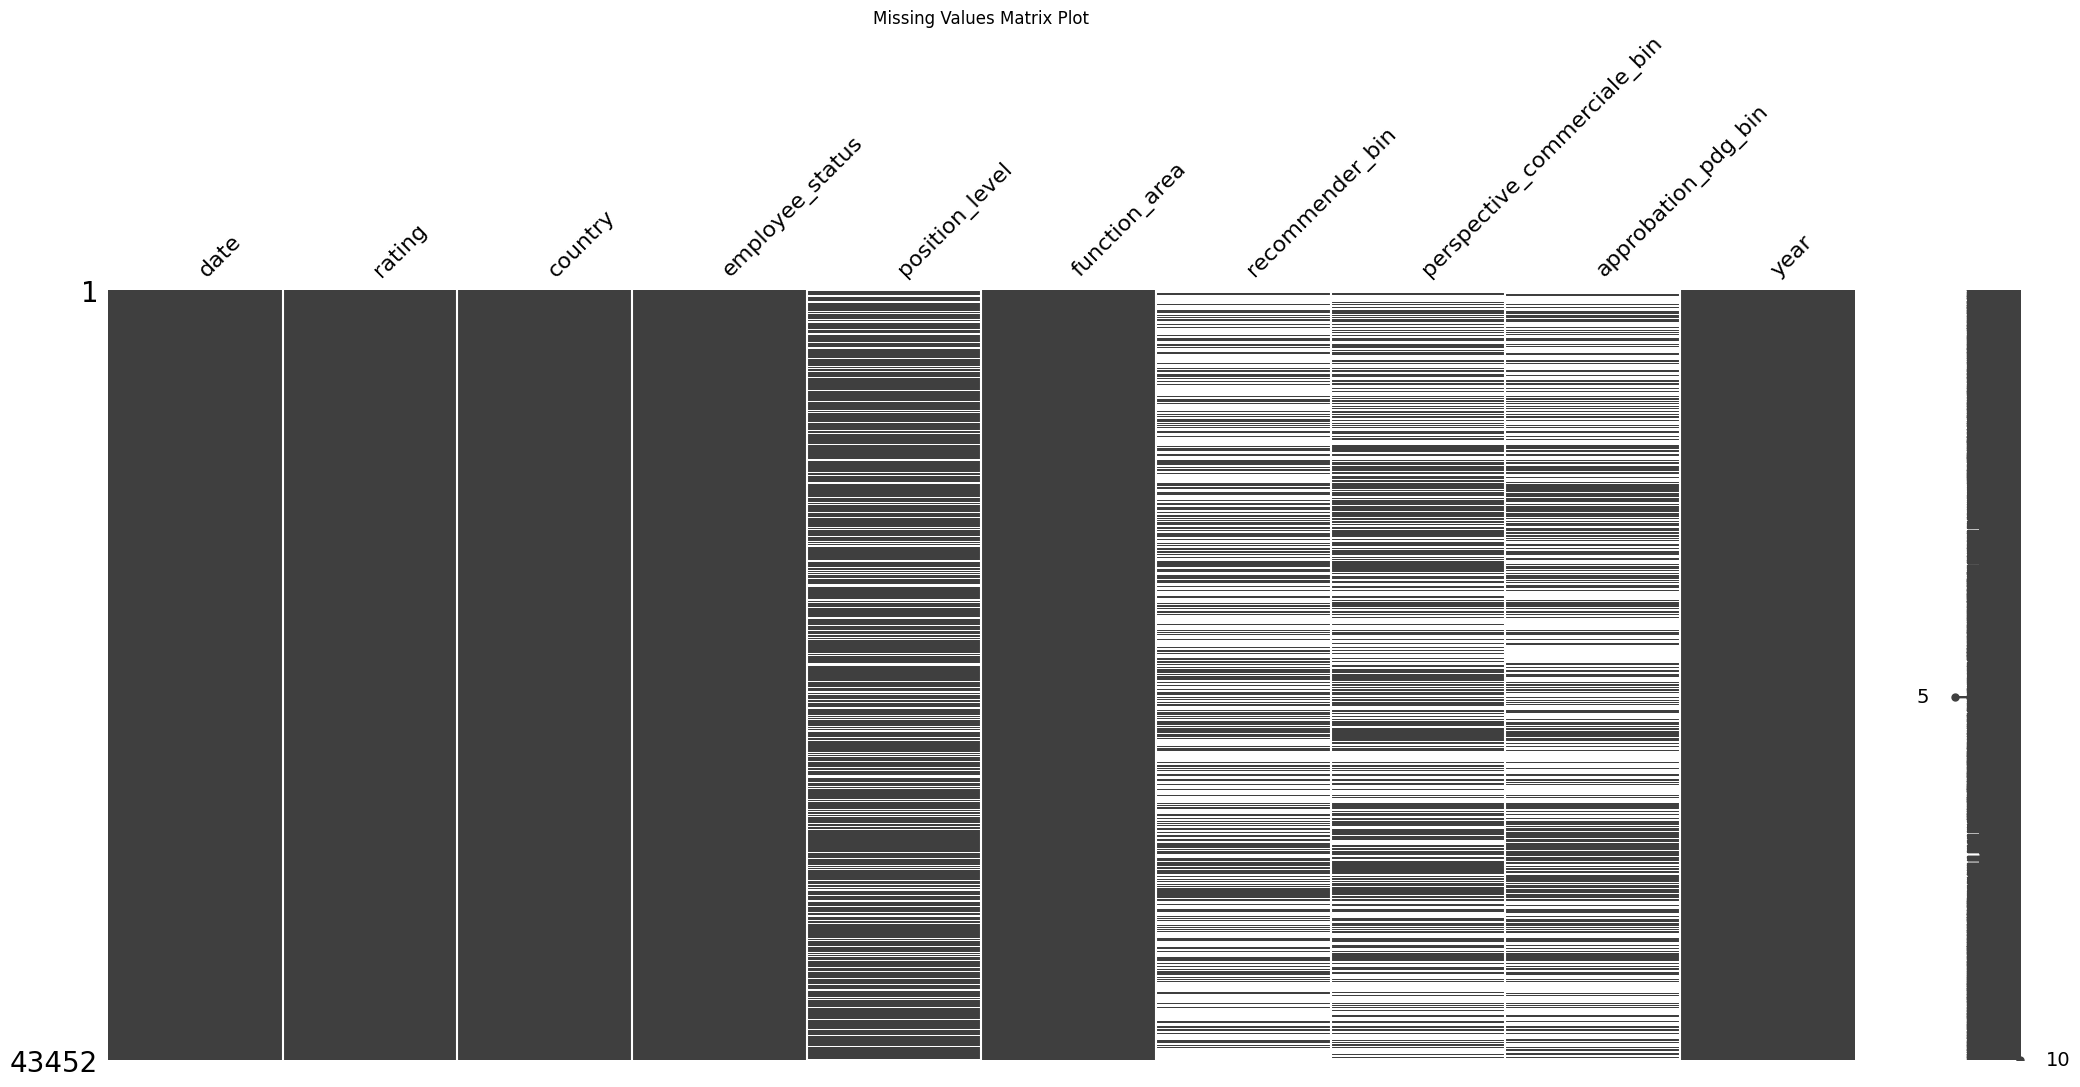

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Generate a missingno matrix plot
msno.matrix(copy_df)
plt.title('Missing Values Matrix Plot')
plt.show()

The `missingno.matrix` plot provides a visual density of missingness. Each row represents a data entry, and each column represents a feature. A white line indicates a missing value, while a black line indicates a present value. This plot is useful for seeing patterns in missing data across your dataset.

In [ ]:
copy_df.describe(include="all")

,date,rating,country,employee_status,position_level,function_area,recommender_bin,perspective_commerciale_bin,approbation_pdg_bin,year
count,43452,43447.000000,43452,43452.000000,35520,43452,17727.000000,23342.000000,20581.000000,43452.000000
unique,5030,NaN,65,NaN,7,8,NaN,NaN,NaN,NaN
top,2021-01-12,NaN,United States,NaN,Associate,Other,NaN,NaN,NaN,NaN
freq,81,NaN,12688,NaN,15319,27078,NaN,NaN,NaN,NaN
mean,NaN,3.832815,NaN,0.615070,NaN,NaN,0.554352,0.573130,0.528886,2020.014959
std,NaN,1.034310,NaN,0.486584,NaN,NaN,0.832306,0.666888,0.618553,3.355908
min,NaN,1.000000,NaN,0.000000,NaN,NaN,-1.000000,-1.000000,-1.000000,2008.000000
25%,NaN,3.000000,NaN,0.000000,NaN,NaN,1.000000,0.000000,0.000000,2019.000000
50%,NaN,4.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,2021.000000
75%,NaN,5.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,2022.000000


1. Overview of the missingness

 - High missingness (50–60%): recommender_bin → ~59% missing; approbation_pdg_bin → ~53% missing; perspective_commerciale_bin → ~46% missing

- Moderate missingness (~18%): position_level → ~18% missing ;

- Almost no missing values:  rating, country, date, function_area, employee_status, employee_status_label, year are fully complete.


2. Interpretation

The missing values are not random. The three engagement indicators likely correspond to optional survey questions or questions only shown to certain employees (e.g., specific countries or levels). The variable position_level missingness (~18%) might correspond to:

- interns or temporary workers without standardized levels

- system heterogeneity between countries

- data entry gaps


3. Why this matters for modelling

- Models like Logistic Regression cannot handle missing values directly → we must impute or encode them.

- Missingness itself may carry signal:

    - Employees not answering recommender/CEO approval questions might show lower engagement.

    - Missing position_level may be related to junior roles.

    - This means missingness can be informative, not just noise.

## 4. Global descriptive stats

In [ ]:
copy_df.describe(include="all")


,date,rating,country,employee_status,position_level,function_area,recommender_bin,perspective_commerciale_bin,approbation_pdg_bin,year
count,43452,43447.000000,43452,43452.000000,35520,43452,17727.000000,23342.000000,20581.000000,43452.000000
unique,5030,NaN,65,NaN,7,8,NaN,NaN,NaN,NaN
top,2021-01-12,NaN,United States,NaN,Associate,Other,NaN,NaN,NaN,NaN
freq,81,NaN,12688,NaN,15319,27078,NaN,NaN,NaN,NaN
mean,NaN,3.832815,NaN,0.615070,NaN,NaN,0.554352,0.573130,0.528886,2020.014959
std,NaN,1.034310,NaN,0.486584,NaN,NaN,0.832306,0.666888,0.618553,3.355908
min,NaN,1.000000,NaN,0.000000,NaN,NaN,-1.000000,-1.000000,-1.000000,2008.000000
25%,NaN,3.000000,NaN,0.000000,NaN,NaN,1.000000,0.000000,0.000000,2019.000000
50%,NaN,4.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,2021.000000
75%,NaN,5.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,2022.000000


- The code df.describe(include="all") is a very useful command in pandas for getting a quick statistical summary of your DataFrame (df).

- df.describe(): This method generates descriptive statistics of the DataFrame's columns. By default, for numeric data, it includes:

    - count: The number of non-null observations.
    - mean: The average value.
    - std: The standard deviation.
    - min: The minimum value.
    - 25%: The 25th percentile (1st quartile).
    - 50%: The 50th percentile (median, 2nd quartile).
    - 75%: The 75th percentile (3rd quartile).
    - max: The maximum value.

 - include="all": This is a crucial argument. By default, describe() only works on numeric columns. When you add include="all":

- It will include statistics for all columns, regardless of their data type (numeric, object/string, datetime, etc.).
- For non-numeric (object) columns, it will provide different relevant statistics such as:
    - count: Number of non-null entries.
    - unique: Number of distinct values.
    - top: The most frequent value.
    - freq: The frequency of the most frequent value.
- For datetime columns, it might also show first and last dates.



- Rating:
The average rating is 3.83 with the median at 4.
This shows that most employees give high scores (4–5) and only a small minority give low scores.
→ The satisfaction variable is skewed toward positive values.

- Country:
There are 65 countries, but the dataset is dominated by the United States (12,688 entries).
→ Country is important but not balanced across regions.

-   Position level:
There are 7 levels, with Associate being the most common.
→ The dataset is mainly composed of junior/mid-level employees.

- Function area:
Only 8 functions, with a huge “Other” category.
→ Functional categories are broad.

-,Engagement indicators (*_bin variables):
Their mean values are all positive, meaning employees tend to answer these questions favorably.
→ These variables likely correlate strongly with satisfaction.

- Employee status:
Two categories: Current dominates.
→ Most responses come from people still employed.

- Year:
Values range from 2008 to 2024, but the average is around 2020, meaning most data is recent.
→ Useful to capture time effects.

# Univariate analysis

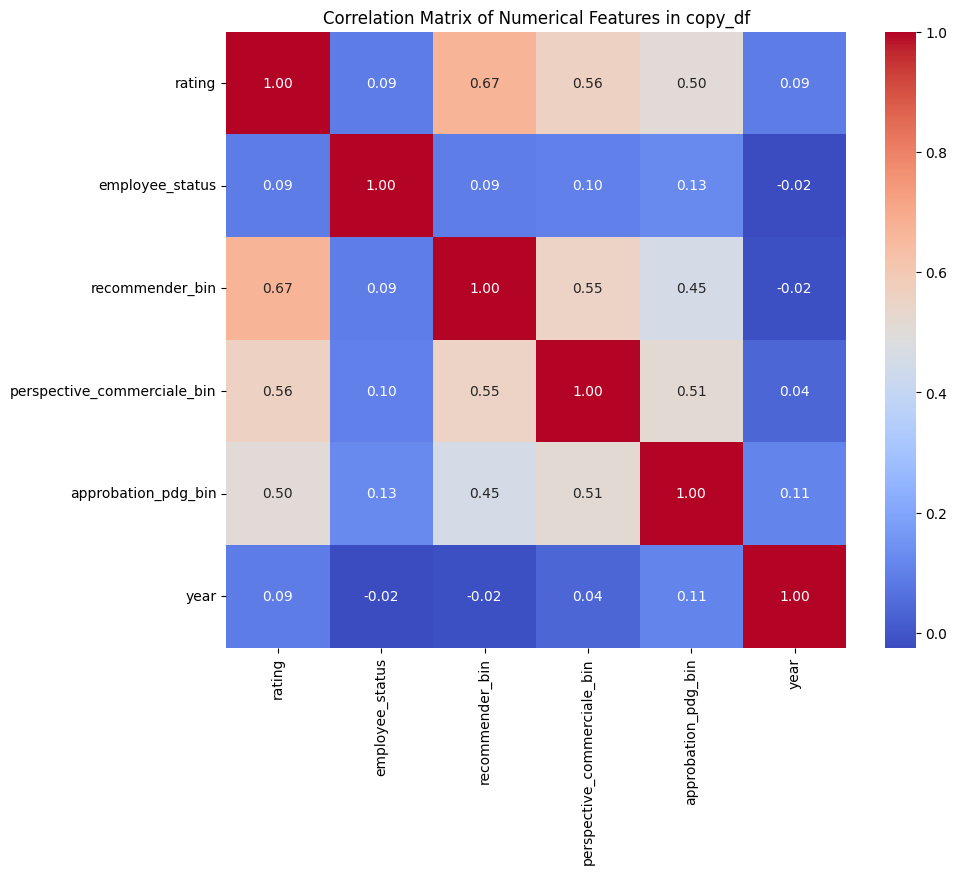

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation matrix
numeric_df = copy_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features in copy_df')
plt.show()

## 1. Rating distribution

In [ ]:
TOTAL = len(copy_df)

# Overall
print("Overall")
display(pd.DataFrame({ #display helps "display" the dataframe as a table and not just numbers one above the other
    "n":[TOTAL],
    "% of total":[100.0],
    "avg_rating":[round(copy_df["rating"].mean(), 2)]
}))

Overall


,n,% of total,avg_rating
0,43452,100.0,3.83


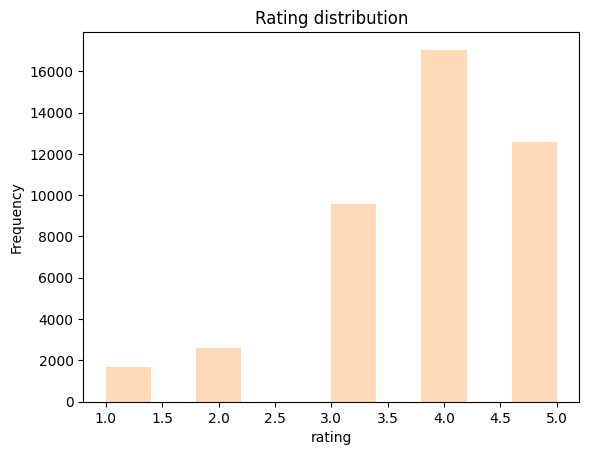

In [ ]:
import matplotlib.pyplot as plt

copy_df['rating'].dropna().plot(kind='hist', bins=10, title='Rating distribution', color='peachpuff') # Using peachpuff as a similar color
plt.xlabel('rating'); plt.show()

### Interpretation
The histogram and summary statistics show that:

- The average rating is 3.83, which indicates that, overall, employees tend to report a positive level of satisfaction.
- The distribution is strongly skewed toward the higher values (4 and 5).
Most employees give 4 or 5, and these two categories represent the majority of responses.

- Ratings of 1 and 2 are very rare, meaning only a small minority of employees express very low satisfaction.

- Ratings of 3 appear in the middle, but still much less frequent than 4 and 5.

This imbalance confirms that low satisfaction is not common in this dataset.

## 2. Creating an at risk feature

- Why the ML target cannot be rating: rating is a 1–5 numeric variable, but:

    - The distribution is heavily skewed toward 4 and 5.

    - Predicting the exact number 1 / 2 / 3 / 4 / 5 is not useful for the business.

    - A regression model on this scale would not answer the true business question: **Who is at risk of low satisfaction?**

    - Also, predicting a 3.7 or 4.2 has no meaning in HR analytics. There is no actionable value in predicting "4.1" vs "3.9".

- Why the ML target SHOULD be at_risk: The company wants to identify:

    - employees who may be disengaged,

    - roles or countries where low satisfaction is more frequent,

    - early warning signs.

This is a classification problem, not a regression.

In [ ]:
copy_df["at_risk"] = (copy_df["rating"] <= 3).astype(int)

copy_df["at_risk"].value_counts()
copy_df["at_risk"].value_counts(normalize=True)


,proportion
at_risk,
0,0.681211
1,0.318789


This transformation allows us to frame the problem as a binary classification task, aligned with the HR objective of detecting potentially dissatisfied employees.

The distribution shows that the at-risk population is a minority group, which means the dataset is imbalanced.
From this point on, the EDA focuses on understanding how the at-risk rate varies across countries, roles, functions, employee status, and years — insights that will directly inform the model’s feature selection.

In [ ]:
copy_df

,date,rating,country,employee_status,position_level,function_area,recommender_bin,perspective_commerciale_bin,approbation_pdg_bin,year,recommender_bin_was_missing,approbation_pdg_bin_was_missing,perspective_commerciale_bin_was_missing,at_risk
0,2022-04-19,2.0,Australia,0,NaN,Other,-1,0,0,2022,False,True,True,1
1,2021-12-29,3.0,Pakistan,0,Associate,Consulting–Advisory,1,-1,1,2021,False,False,False,1
2,2022-03-29,4.0,Singapore,1,Director,Other,1,1,1,2022,True,True,True,0
3,2022-04-12,4.0,Ireland,1,Senior Manager,Tech–IT–Data,1,1,1,2022,True,True,True,0
4,2022-04-12,5.0,Malaysia,1,Senior Manager,Other,1,1,1,2022,True,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43447,2023-02-20,4.0,United States,0,Associate,Tech–IT–Data,1,1,1,2023,True,True,True,0
43448,2023-02-21,5.0,Indonesia,0,Associate,Audit–Assurance,1,1,1,2023,False,False,False,0
43449,2023-02-21,4.0,Singapore,1,Associate,Other,1,1,1,2023,True,True,True,0
43450,2023-02-28,3.0,United States,1,Senior Associate,Other,1,0,0,2023,True,True,True,1


### Visualizing the at_risk target

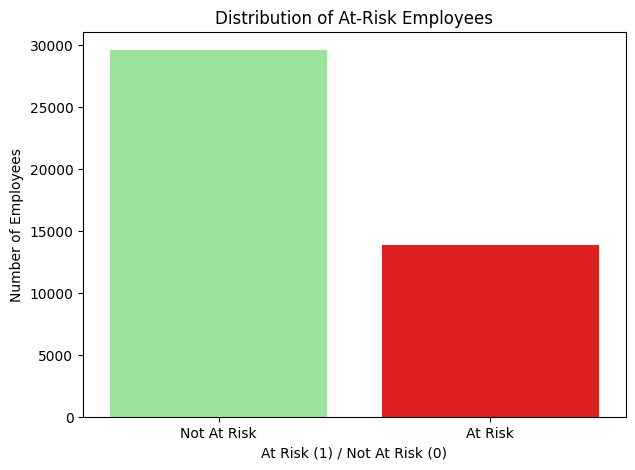

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom palette for at_risk: 0 (Not At Risk) is green, 1 (At Risk) is red
custom_palette = {0: 'lightgreen', 1: 'red'}

plt.figure(figsize=(7, 5))
sns.countplot(x='at_risk', data=copy_df, palette=custom_palette, hue='at_risk', legend=False)
plt.title('Distribution of At-Risk Employees')
plt.xlabel('At Risk (1) / Not At Risk (0)')
plt.ylabel('Number of Employees')
plt.xticks(ticks=[0, 1], labels=['Not At Risk', 'At Risk'])
plt.show()

### Visualizing 'at_risk' distribution by categorical features

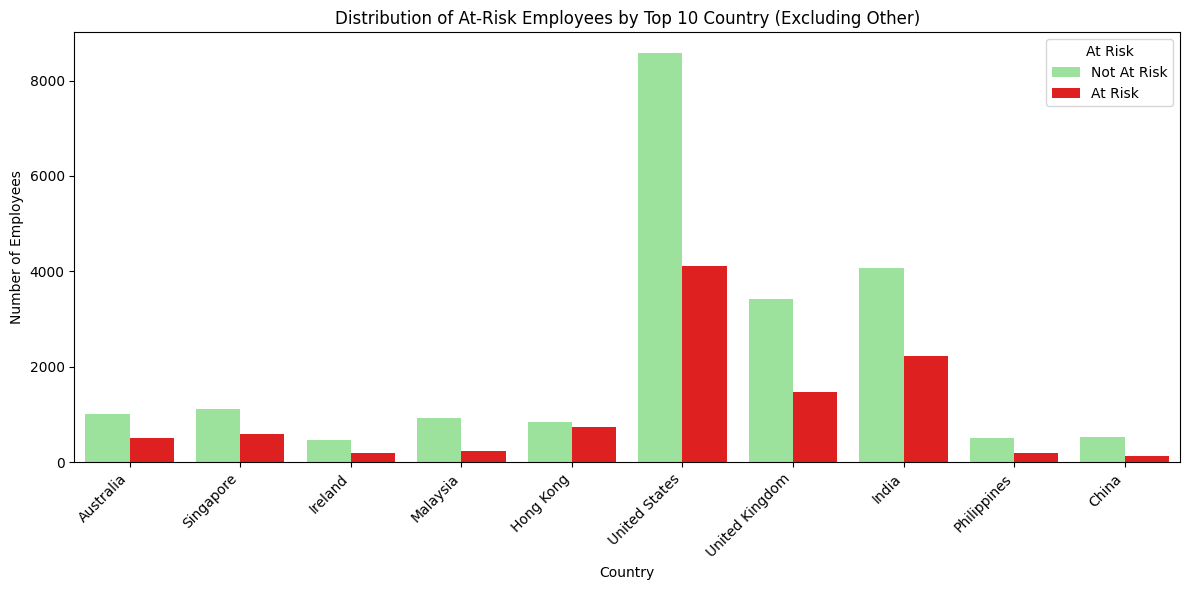

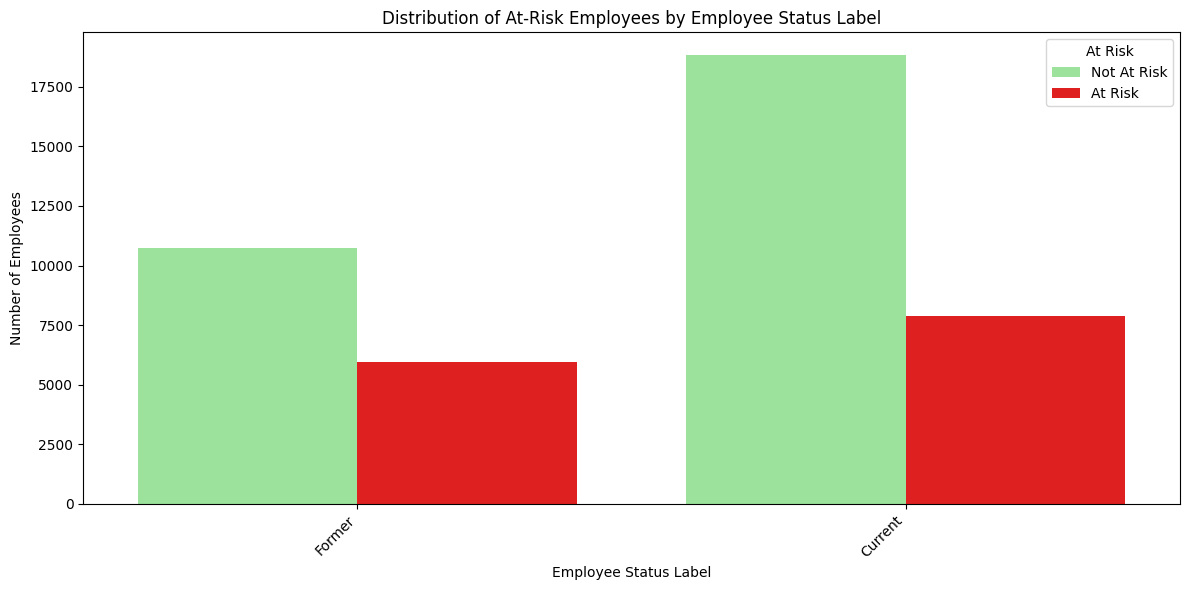

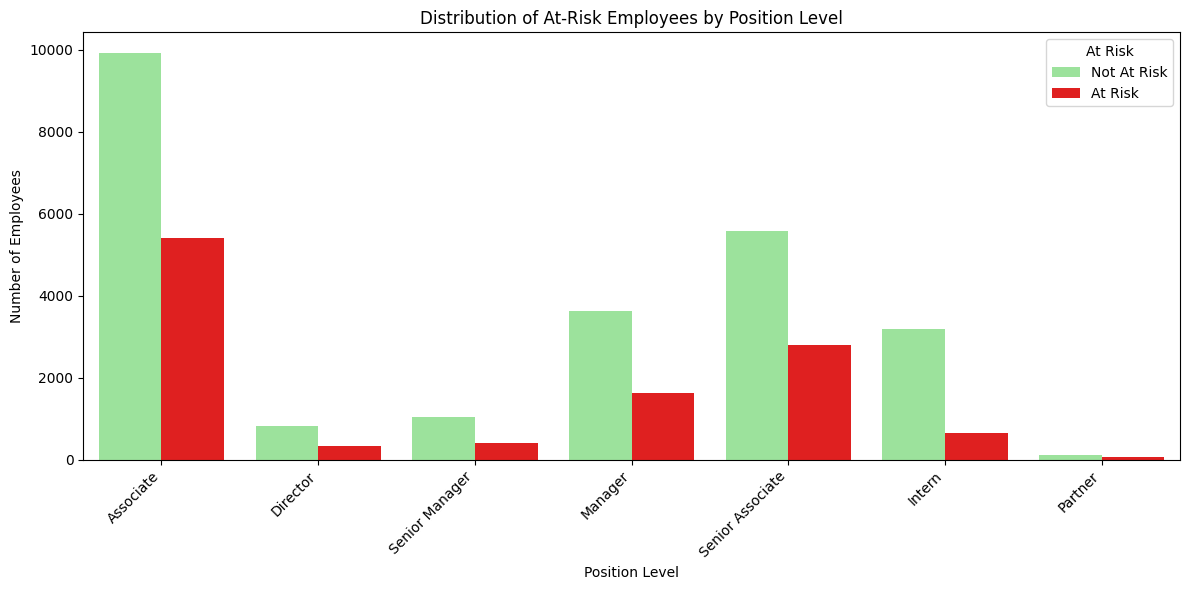

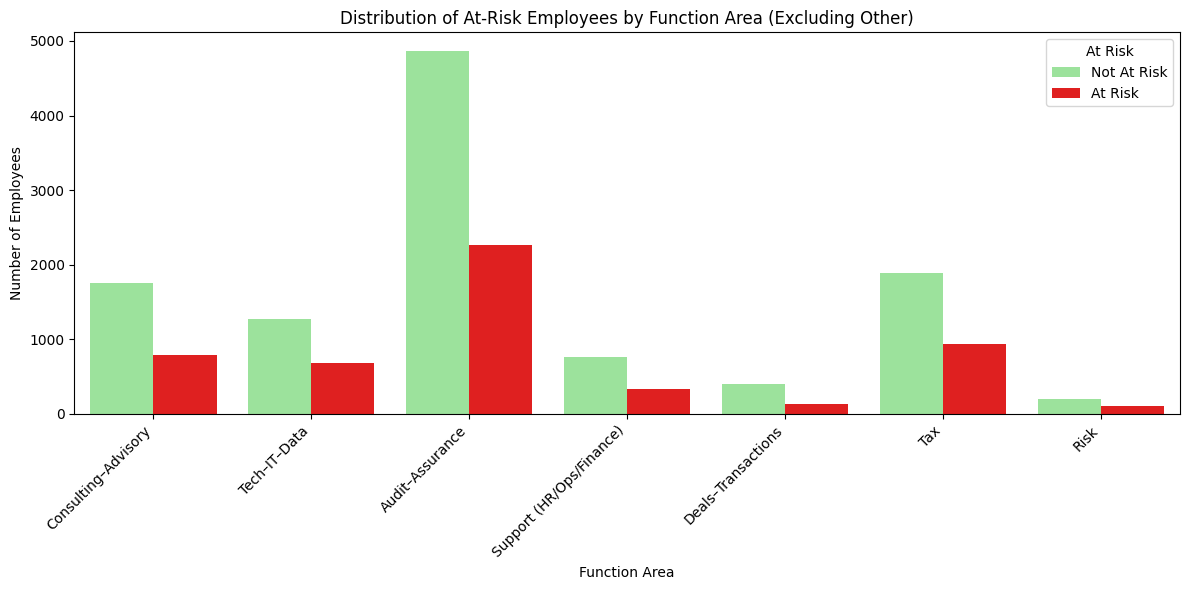

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a temporary DataFrame to safely modify for plotting
plot_df = copy_df.copy()

# Map employee_status to human-readable labels for plotting
code_to_label = {0: 'Former', 1: 'Current'}
plot_df['employee_status_label'] = plot_df['employee_status'].map(code_to_label)

categorical_features = ['country', 'employee_status_label', 'position_level', 'function_area']

# Define custom palette for at_risk: 0 (Not At Risk) is green, 1 (At Risk) is red
custom_palette = {0: 'lightgreen', 1: 'red'}

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    data_for_plot = plot_df.copy() # Start with a copy for each plot to apply filters safely
    title = f'Distribution of At-Risk Employees by {feature.replace("_", " ").title()}'

    if feature == 'country':
        # Exclude 'Other' from country plot if present, before selecting top N
        data_for_plot = data_for_plot[data_for_plot['country'] != 'Other']
        # For country, take the top 10 countries by count to avoid overcrowding the plot
        top_countries = data_for_plot['country'].value_counts().nlargest(10).index
        data_for_plot = data_for_plot[data_for_plot['country'].isin(top_countries)]
        title = f'Distribution of At-Risk Employees by Top 10 {feature.replace("_", " ").title()} (Excluding Other)'
    elif feature == 'function_area':
        # Exclude 'Other' from function_area plot as requested
        data_for_plot = data_for_plot[data_for_plot['function_area'] != 'Other']
        title = f'Distribution of At-Risk Employees by {feature.replace("_", " ").title()} (Excluding Other)'

    sns.countplot(x=feature, hue='at_risk', data=data_for_plot, palette=custom_palette)
    plt.title(title)
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='At Risk', labels=['Not At Risk', 'At Risk'])
    plt.tight_layout()
    plt.show()

### Interpretation

#### 1. At-Risk by Country (Top 10 Countries)
- The United States, United Kingdom, and India have the highest total number of employees, so they naturally show the largest absolute counts for both at-risk and not-at-risk groups.

- However, the proportion of at-risk employees varies:

    - Countries like Philippines and China show lower at-risk proportions, even if their total population is smaller.

    - Countries such as Malaysia or Hong Kong show a more balanced split, suggesting potential dissatisfaction pockets.

    - This confirms that country effects matter and should be included as a key feature.

**Takeaway**:
Differences across countries are not only driven by volume but also by varying levels of dissatisfaction → country is a strong predictive feature.

#### 2. At-Risk by Employee Status (Former vs Current)

- Former employees show a significantly higher proportion of at-risk responses compared to current employees.

- This is expected: employees who eventually leave tend to be more dissatisfied beforehand.

- Even among current employees, the at-risk population remains visible, which is important for prediction.

**Takeaway:**

Employee status is strongly correlated with dissatisfaction, but it must be treated carefully — the model should not rely solely on “Former” to detect risk. Still, it is a valid and informative feature.

#### 3. At-Risk by Position Level

- Associates and Senior Associates make up the largest groups, and both contain a noticeable number of at-risk employees.

- Mid-level roles such as Manager and Senior Manager also show meaningful at-risk populations.

- Interns and Partners have very low at-risk counts (small volume + likely different expectations or survey dynamics).

**Takeaway** :

Dissatisfaction exists across all seniority levels, but its magnitude differs. Position level is an essential feature for modelling risk.

#### 4. At-Risk by Function Area (excluding “Other”)

- Some functions, like Audit–Assurance, have a large absolute number of at-risk employees simply due to size.

- - Others like Consulting–Advisory and Tech–IT–Data show visible at-risk populations as well.

Meanwhile, smaller functions (Risk, Support, Deals) have fewer at-risk employees, but this is tied to smaller headcount.

**Takeaway** :
Function area influences employee satisfaction. It should be included as a categorical variable during modeling.

### Visualizing 'at_risk' distribution by Year

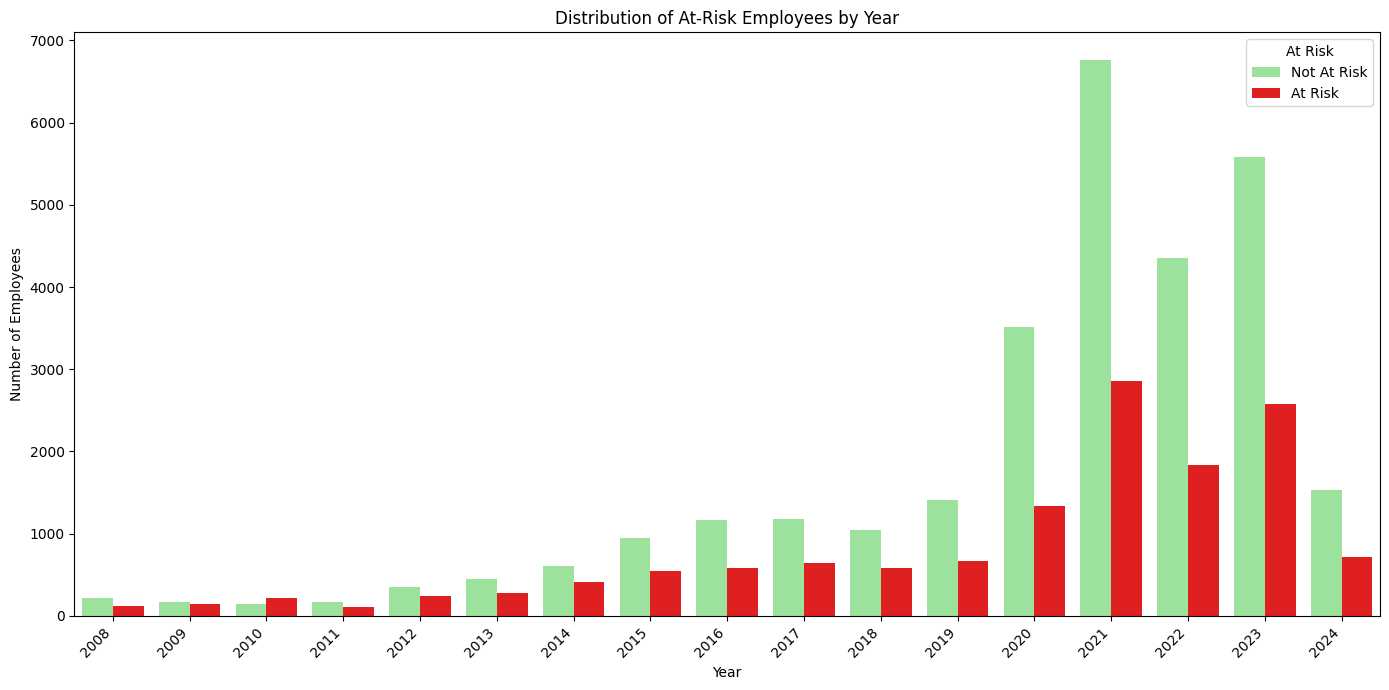

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom palette for at_risk: 0 (Not At Risk) is green, 1 (At Risk) is red
custom_palette = {0: 'lightgreen', 1: 'red'}

plt.figure(figsize=(14, 7))
sns.countplot(x='year', hue='at_risk', data=copy_df, palette=custom_palette)
plt.title('Distribution of At-Risk Employees by Year')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.legend(title='At Risk', labels=['Not At Risk', 'At Risk'])
plt.tight_layout()
plt.show()

5. At-Risk Employees by Year

- The number of survey responses increases sharply after 2018, with a huge rise in 2020–2023. This means more recent years dominate the dataset and will have stronger influence during modelling.

- Both at-risk and not-at-risk counts grow over time, but the proportion remains relatively stable:
even when the volume increases, the share of at-risk employees does not spike dramatically.

    - 2021 shows the largest total volume, which likely reflects a company-wide survey push or broader participation.

    - The at-risk proportion appears slightly higher in 2020–2021, which could be linked to global or organizational events (e.g., COVID period, remote work shifts, operational stress).

    - 2024 shows fewer responses (probably partial-year data), but the at-risk pattern stays consistent.

**Takeaway** :
The year variable captures meaningful temporal patterns and differences in overall engagement. The consistent presence of at-risk employees across years suggests that dissatisfaction is not tied to a single isolated period.
Therefore, year should be included as a categorical feature in the model.

# Conclusion

- Satisfaction ratings are mostly 4–5, and only a minority of employees score ≤ 3, confirming that at_risk is an imbalanced binary target.


The at-risk group varies clearly by country, position level, function, and employee status. These differences confirm that dissatisfaction is structured, not random.


Over time, survey volume increases (especially after 2019), but the proportion of at-risk employees stays relatively stable, meaning year adds useful temporal context.


Engagement indicators (*_bin) appear related to risk and must be included.


👉 Conclusion: The features that matter for modelling are country, role, function, employee status, year, and engagement indicators.
We can now move to preprocessing to encode categorical variables and handle missing values.